<a href="https://colab.research.google.com/github/ronitshetty16/Shapley-Clusters/blob/main/Shapley_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualization of Shapley Galaxy dataset

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
galaxy = pd.read_csv("/content/Shapley_galaxy_data.csv")
galaxy.head()

,R.A.,Dec.,Mag,V,SigV
0,193.02958,-32.84556,15.23,15056,81
1,193.04042,-28.54083,17.22,16995,32
2,193.04042,-28.22556,17.29,21211,81
3,193.05417,-28.33889,18.20,29812,37
4,193.05542,-29.84056,12.55,2930,38


In [4]:
galaxy.shape

(4215, 5)

Astronomical Coordinate System

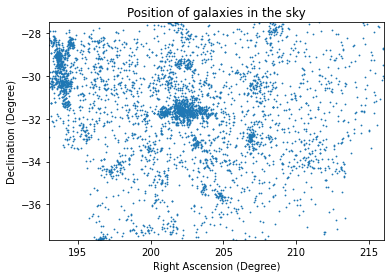

In [5]:
plt.plot(galaxy["R.A."], galaxy["Dec."], 'o', markersize = 0.8)
plt.xlabel("Right Ascension (Degree)")
plt.ylabel("Declination (Degree)")
plt.title ("Position of galaxies in the sky")
plt.xlim(galaxy['R.A.'].min(),galaxy['R.A.'].max())
plt.ylim(galaxy['Dec.'].min(),galaxy['Dec.'].max())
plt.show()

In [6]:
radec = SkyCoord(ra=galaxy['R.A.']*u.degree, dec=galaxy['Dec.']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

galaxy['l'] = galactic.l.value
galaxy['b'] = galactic.b.value





galaxy.head()

,R.A.,Dec.,Mag,V,SigV,l,b
0,193.02958,-32.84556,15.23,15056,81,303.096985,30.025970
1,193.04042,-28.54083,17.22,16995,32,303.124410,34.330647
2,193.04042,-28.22556,17.29,21211,81,303.125715,34.645915
3,193.05417,-28.33889,18.20,29812,37,303.139935,34.532543
4,193.05542,-29.84056,12.55,2930,38,303.134654,33.030879


In [18]:
#Calculating the redshifts of the galaxies
redshift=[]
for i in galaxy['V']:
  redshift.append(format(i/299792458,".6f"))

Redshift = list(map(float, redshift))
print(Redshift)

[5e-05, 5.7e-05, 7.1e-05, 9.9e-05, 1e-05, 5.4e-05, 5.8e-05, 5.7e-05, 0.000105, 4.9e-05, 5.5e-05, 5.7e-05, 5.5e-05, 9.2e-05, 5.5e-05, 1.2e-05, 5.2e-05, 9.7e-05, 5.4e-05, 5e-05, 0.000108, 5.3e-05, 7.2e-05, 7e-05, 5e-05, 0.000109, 0.000106, 0.000105, 9.1e-05, 0.000105, 0.000106, 0.000106, 5.2e-05, 2.9e-05, 5e-05, 5.2e-05, 8.7e-05, 5.6e-05, 1e-05, 0.000106, 9.3e-05, 5.8e-05, 9.4e-05, 3.1e-05, 5.5e-05, 5.7e-05, 5.8e-05, 5.3e-05, 5.5e-05, 5e-05, 0.000107, 8.5e-05, 5.5e-05, 0.000103, 5.5e-05, 0.000102, 6.2e-05, 5.9e-05, 5.5e-05, 2.7e-05, 5.4e-05, 5.4e-05, 8.6e-05, 0.000111, 9.6e-05, 5.6e-05, 5.7e-05, 5.1e-05, 5.2e-05, 3.1e-05, 5.4e-05, 5.6e-05, 5.3e-05, 5.4e-05, 4.1e-05, 7e-05, 7e-05, 7.1e-05, 8.6e-05, 5.5e-05, 4.1e-05, 7e-05, 5.5e-05, 7e-05, 5e-05, 5.6e-05, 5.2e-05, 5.2e-05, 0.000104, 6.9e-05, 0.000106, 1.1e-05, 6.9e-05, 0.000103, 5.5e-05, 4.9e-05, 7.7e-05, 0.000103, 4.9e-05, 3.2e-05, 5.3e-05, 5.6e-05, 8.7e-05, 5.5e-05, 6e-05, 5.9e-05, 7.2e-05, 9.3e-05, 5.9e-05, 5.6e-05, 5.3e-05, 5.9e-05, 9.

In [19]:
#Adding a new column 'Redshift' in the existing dataframe
galaxy['Redshift'] = Redshift

galaxy.head()

,R.A.,Dec.,Mag,V,SigV,l,b,Redshift
0,193.02958,-32.84556,15.23,15056,81,303.096985,30.025970,0.000050
1,193.04042,-28.54083,17.22,16995,32,303.124410,34.330647,0.000057
2,193.04042,-28.22556,17.29,21211,81,303.125715,34.645915,0.000071
3,193.05417,-28.33889,18.20,29812,37,303.139935,34.532543,0.000099
4,193.05542,-29.84056,12.55,2930,38,303.134654,33.030879,0.000010


In [20]:
#Calculating distances of the galaxies and adding a new column 'Distance' in the existing dataframe
r = cosmo.comoving_distance(galaxy['Redshift'])
galaxy['Distance']= r.value

galaxy.head()

,R.A.,Dec.,Mag,V,SigV,l,b,Redshift,Distance
0,193.02958,-32.84556,15.23,15056,81,303.096985,30.025970,0.000050,0.216236
1,193.04042,-28.54083,17.22,16995,32,303.124410,34.330647,0.000057,0.246508
2,193.04042,-28.22556,17.29,21211,81,303.125715,34.645915,0.000071,0.307053
3,193.05417,-28.33889,18.20,29812,37,303.139935,34.532543,0.000099,0.428142
4,193.05542,-29.84056,12.55,2930,38,303.134654,33.030879,0.000010,0.043248


In [21]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(galaxy['Distance'],galaxy['R.A.'],galaxy['Dec.'])
galaxy['x_coord'] = cart[0]
galaxy['y_coord'] = cart[1]
galaxy['z_coord'] = cart[2]

galaxy.head()

,R.A.,Dec.,Mag,V,SigV,l,b,Redshift,Distance,x_coord,y_coord,z_coord
0,193.02958,-32.84556,15.23,15056,81,303.096985,30.025970,0.000050,0.216236,-0.176990,-0.040958,-0.117281
1,193.04042,-28.54083,17.22,16995,32,303.124410,34.330647,0.000057,0.246508,-0.210967,-0.048862,-0.117778
2,193.04042,-28.22556,17.29,21211,81,303.125715,34.645915,0.000071,0.307053,-0.263565,-0.061045,-0.145219
3,193.05417,-28.33889,18.20,29812,37,303.139935,34.532543,0.000099,0.428142,-0.367093,-0.085116,-0.203233
4,193.05542,-29.84056,12.55,2930,38,303.134654,33.030879,0.000010,0.043248,-0.036544,-0.008474,-0.021519


Plot the Galaxies location

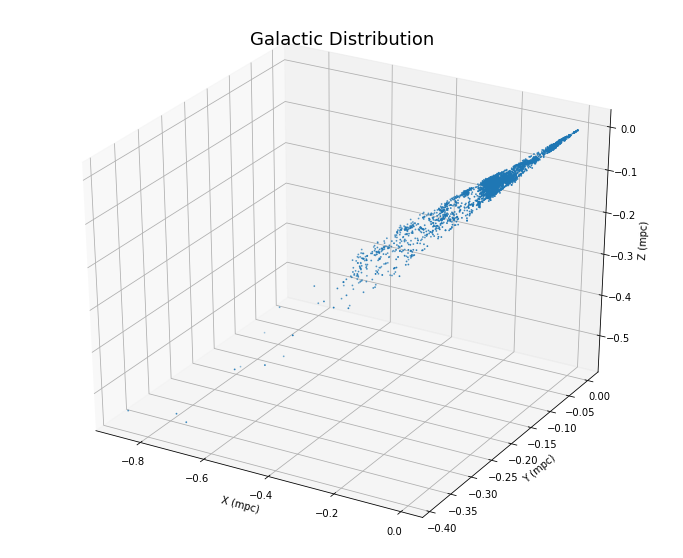

In [23]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['x_coord'],galaxy['y_coord'],galaxy['z_coord'], s = 0.7)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_zlabel('Z (mpc)')
ax.set_title('Galactic Distribution',fontsize=18)
plt.show()

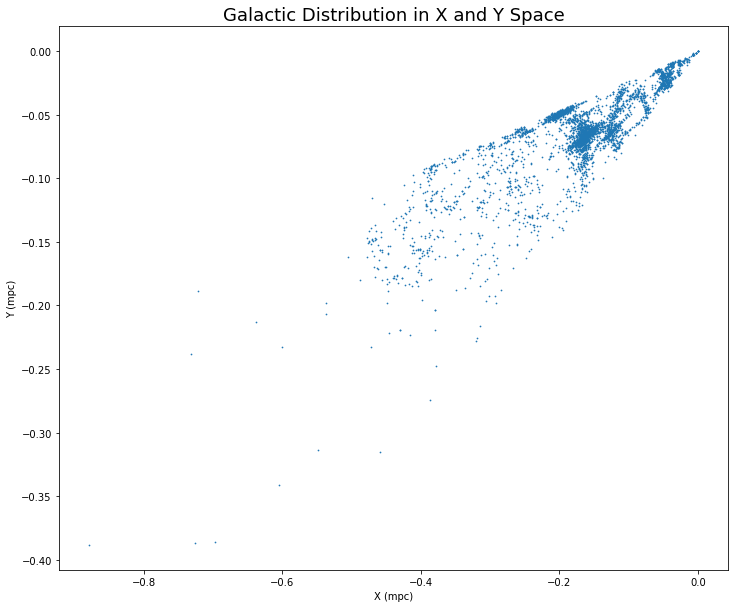

In [24]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(galaxy['x_coord'],galaxy['y_coord'], s = 0.5)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_title('Galactic Distribution in X and Y Space',fontsize=18)
plt.show()

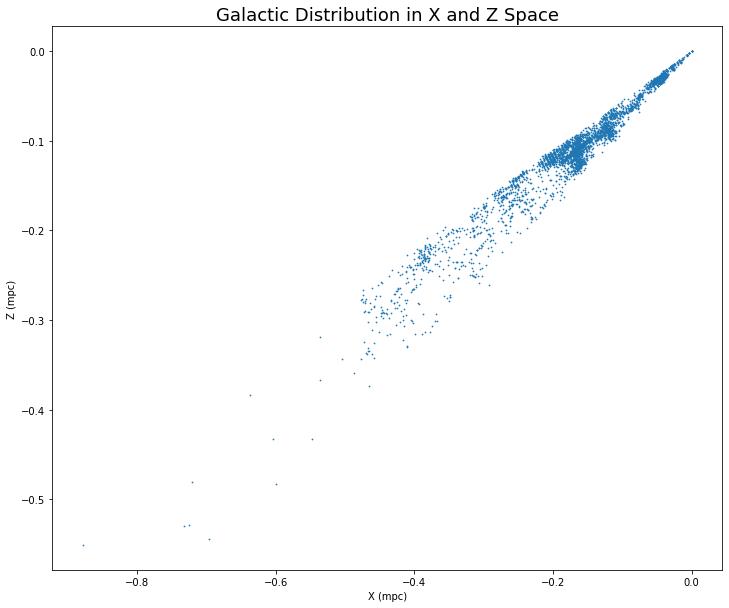

In [25]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(galaxy['x_coord'],galaxy['z_coord'], s = 0.5)
ax.set_xlabel('X (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution in X and Z Space',fontsize=18)
plt.show()


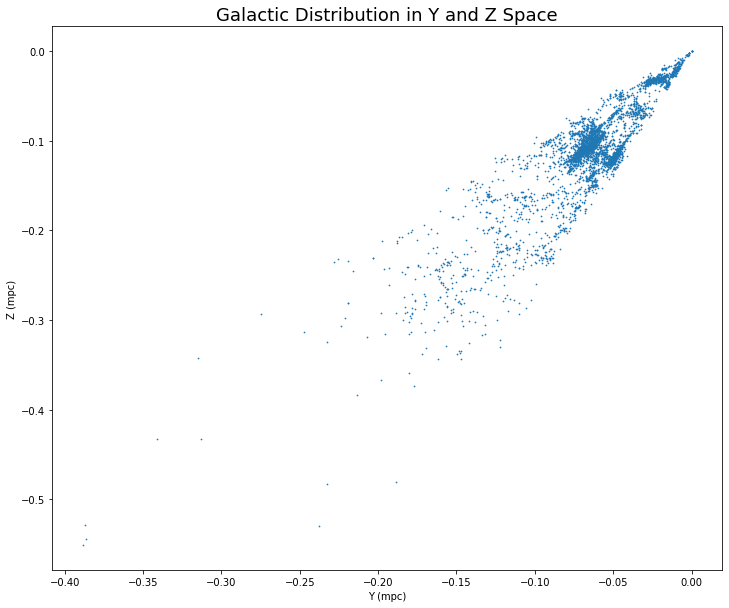

In [26]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(galaxy['y_coord'],galaxy['z_coord'], s = 0.5)
ax.set_xlabel('Y (mpc)')
ax.set_ylabel('Z (mpc)')
ax.set_title('Galactic Distribution in Y and Z Space',fontsize=18)
plt.show()

Redshift and Distance Distrubution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


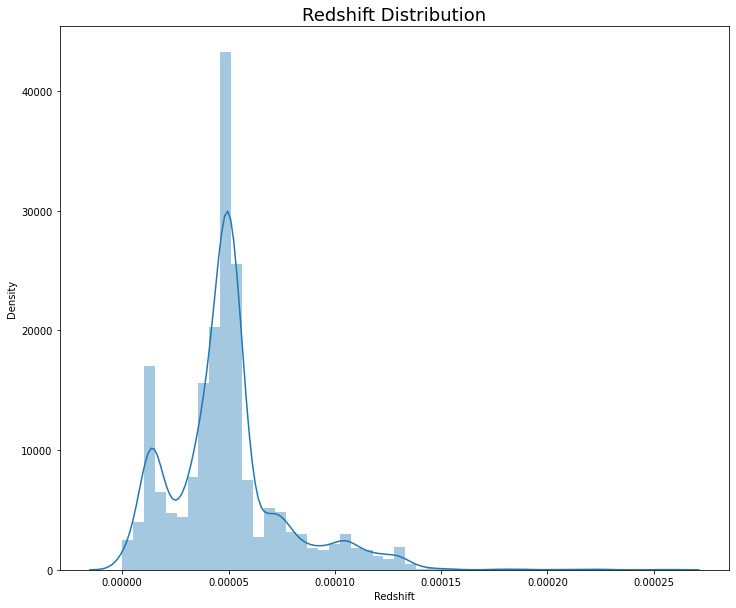

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


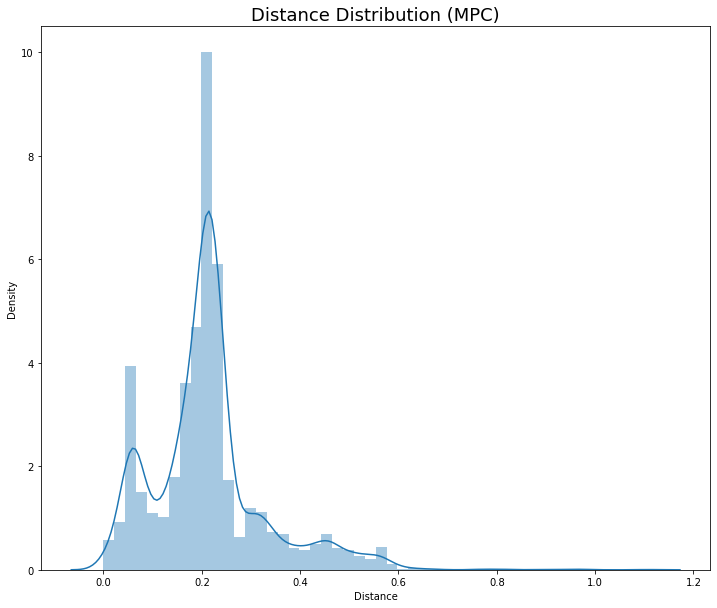

In [28]:

fig = plt.figure(figsize=(12,10))
sns.distplot(galaxy['Redshift'])
plt.title('Redshift Distribution',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
sns.distplot(galaxy['Distance'])
plt.title('Distance Distribution (MPC)',fontsize=18)
plt.show()